In [334]:
# Importing the libraries
import numpy as np
import pandas as pd
import math

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
import pickle
import os
from datetime import datetime
from sklearn.linear_model import Lasso ,Ridge,ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor




import warnings

warnings.filterwarnings('ignore')

In [335]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [336]:
pip install numpy pandas seaborn scikit-learn statsmodels


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [337]:
SPLIT_METHOD = 'time'  # 'time' or 'random'
DATA_PATH = "d:\\Desktop\\spring2\\preprocessed_data.csv"  # Adjusted for local path
OUTPUT_DIR = "."
df = pd.read_csv(DATA_PATH)

#### LASSO

In [338]:
import pickle

# Load saved train-test data
with open('train_test_data.pkl', 'rb') as file:
    X_train, X_test, y_train, y_test, X, y = pickle.load(file)

# load saved model computation results
with open('model_comparison_results.pkl', 'rb') as file:
    test_results_df = pickle.load(file)

In [339]:
# Initiating
lasso_reg = Lasso(alpha = 0.01)
# Fitting and training the model
lasso_reg.fit(X_train,y_train)


,alpha,0.01
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


| **Parameter**       | **Used In**                 | **Meaning**                               | **Typical Values**                    | **Effect**                                   |
| ------------------- | --------------------------- | ----------------------------------------- | ------------------------------------- | -------------------------------------------- |
| `alpha`             | Ridge, Lasso, ElasticNet    | Regularization strength                   | 0.001 → 100                           | Larger → more penalty → smaller coefficients |
| `l1_ratio`          | ElasticNet                  | Balance between L1 (Lasso) and L2 (Ridge) | 0–1 (e.g., 0.5)                       | 1 = pure Lasso, 0 = pure Ridge               |
| `fit_intercept`     | Linear, Ridge, Lasso        | Whether to calculate intercept            | True / False                          | If False, model assumes data centered        |
| `max_iter`          | Ridge, Lasso, Logistic, SVM | Max optimization iterations               | 1000–10000                            | Higher = more accurate, slower               |
| `tol`               | Ridge, Lasso, DecisionTree  | Tolerance to stop optimization            | 1e-3 → 1e-5                           | Lower → more precision                       |
| `solver`            | Ridge, LogisticRegression   | Optimization algorithm                    | `'auto'`, `'saga'`, `'lbfgs'`         | Affects speed & accuracy                     |
| `max_depth`         | DecisionTree, RandomForest  | Maximum tree depth                        | 3–20 or None                          | Controls complexity of model                 |
| `min_samples_split` | DecisionTree                | Minimum samples to split a node           | 2–10                                  | Prevents overfitting if higher               |
| `min_samples_leaf`  | DecisionTree                | Minimum samples per leaf node             | 1–5                                   | Smoothens model                              |
| `max_features`      | DecisionTree, RandomForest  | Number of features considered per split   | `'auto'`, `'sqrt'`, `'log2'`, int     | Randomization helps reduce overfitting       |
| `criterion`         | DecisionTree                | Metric to measure split quality           | `'squared_error'`, `'absolute_error'` | Defines error calculation method             |
| `random_state`      | All                         | Sets randomness seed                      | Any integer                           | Ensures reproducibility                      |
| `learning_rate`     | GradientBoosting, XGBoost   | Step size during optimization             | 0.01–0.3                              | Lower → slower but stable learning           |


In [340]:
# Check coefficient
lasso_reg.coef_


array([ 15.26138125,  -0.38808543,  -3.51853144,   2.91833504,
         0.94444776, -13.33562532,  32.73528084,  -8.33451364,
         8.82104296,   6.36542602,  12.01287537])

In [341]:
# get dataframe of x columns and Coeficients
pd.DataFrame(lasso_reg.coef_,X.columns,columns=['Coeficients'])

,Coeficients
yr,15.261381
mnth,-0.388085
holiday,-3.518531
weekday,2.918335
workingday,0.944448
weathersit,-13.335625
temp,32.735281
windspeed,-8.334514
season_2,8.821043
season_3,6.365426


In [342]:
# Check intercept
lasso_reg.intercept_


np.float64(36.84641424396982)

In [343]:
# Checking score
lasso_reg.score(X_train,y_train)

0.7971012931595167

In [344]:
# y prdiction on train data
y_pred_train = lasso_reg.predict(X_train)
# y prdiction on test data
y_pred = lasso_reg.predict(X_test)

#### Model evaluation

In [345]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

#Calculate adjusted R2 Score
adj_r2 = 1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

 The Mean Absolute Error (MAE) is 4.871422284772024.
 The Mean Squred Error(MSE) is 41.1179521298188.
The Root Mean Squared Error(RMSE) is 6.412328136474209.
The R2 Score is 0.8552470643277997.
Adjusted R2 is 0.8434523806804353.


In [346]:
# Create test results dictionary
test_dict = {'Model':"Lasso",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [347]:
# Only append if model not already present
if test_dict['Model'] not in test_results_df['Model'].values:
    test_results_df = pd.concat([test_results_df, pd.DataFrame([test_dict])], ignore_index=True)
else:
    print(f" Model '{test_dict['Model']}' already exists. Skipping append.")


test_results_df

 Model 'Lasso' already exists. Skipping append.


,Model,MAE,MSE,RMSE,R2_score,Adjusted_R2
0,Linear Regression,4.8368,40.4893,6.3631,0.8575,0.8458
1,Lasso,4.8714,41.1180,6.4123,0.8552,0.8435
2,Ridge(GridsearchCv Tunned),4.8374,40.4963,6.3637,0.8574,0.8458
3,ElasticNet(GridSearchCV-Tunned),4.8371,40.4923,6.3634,0.8574,0.8458
4,Decision Tree Regressor(GridsearchCV),4.7906,47.8474,6.9172,0.8316,0.8178
5,Random Forest Regressor,4.3044,38.5620,6.2098,0.8642,0.8532
6,Random Forest Regressor(GridsearchCV),4.3492,39.6697,6.2984,0.8603,0.8490
7,Gardient boosting Regression,4.1702,35.1333,5.9273,0.8763,0.8662


In [348]:
def save_results(df, file_path='model_comparison_results.pkl'):
    import pickle
    with open(file_path, 'wb') as file:
        pickle.dump(df, file)
    print(f" Results saved to {file_path}")


In [349]:
save_results(test_results_df)


 Results saved to model_comparison_results.pkl


In [350]:
# cross validation on Lasso regression
# creating object
lasso_rg = Lasso()

# alphas values's dictionary to pass on in Gridsearchcv 
alphas = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}

lasso_linear_reg = GridSearchCV(lasso_rg, alphas, scoring='neg_mean_squared_error', cv=4)
# fitting model
lasso_linear_reg.fit(X_train, y_train)

,estimator,Lasso()
,param_grid,"{'alpha': [1e-15, 1e-13, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,4
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,0.01


In [351]:
# Since it showing best parameter alpha= 1.. alpha =1 means it will be as linear regression.
print(f'The best alpha value is {lasso_linear_reg.best_params_}')
print(f'The best negative mean squred error value is {lasso_linear_reg.best_score_}')

The best alpha value is {'alpha': 0.01}
The best negative mean squred error value is -52.315616042952456


In [352]:
# define a fucntion to plot predicted y values and actual y values
def plot_Pred_vs_actual(y_pred_test,y_test):
  ''' 
  Visualize predicted values with actual values.
  '''
  plt.figure(figsize=(20,8))
  plt.plot(y_pred_test)
  plt.plot(np.array(y_test))
  plt.legend(["Predicted","Actual"],)
  plt.title("Predicted V/S Actual")
  plt.show()

In [353]:
# define a function to plot scatter plot for y_test and y_actual.
def plot_scatter(y_pred_test,y_test):
  '''
  Plot scatter plot for y_test values and y_test values. To check how close we are to regresson line
  '''
  plt.figure(figsize=(16,5))
  sns.regplot(x = y_test,y = y_pred_test, line_kws={'color':'red'})
  plt.xlabel('Actual')
  plt.ylabel("Predicted")
  plt.title("Actual v/s Predicted")

In [354]:
# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed).
def Residual_distPlot(y_pred_test,y_test):  
  '''
  Checks the distribution of residals
  '''        
                                                    
  plt.figure(figsize=(10,5))
  sns.distplot(x = y_test-y_pred_test)
  plt.title("Residual Distribution")

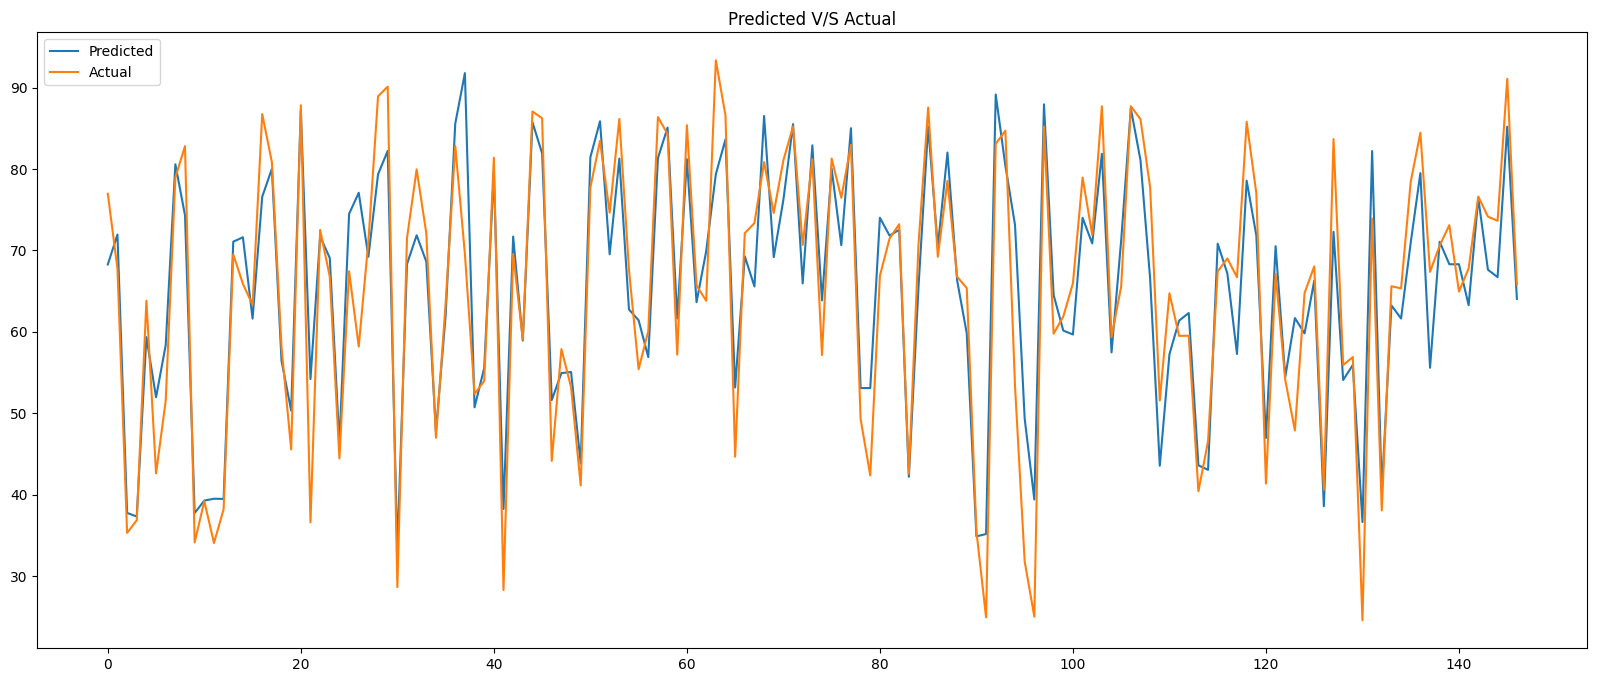

In [355]:
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

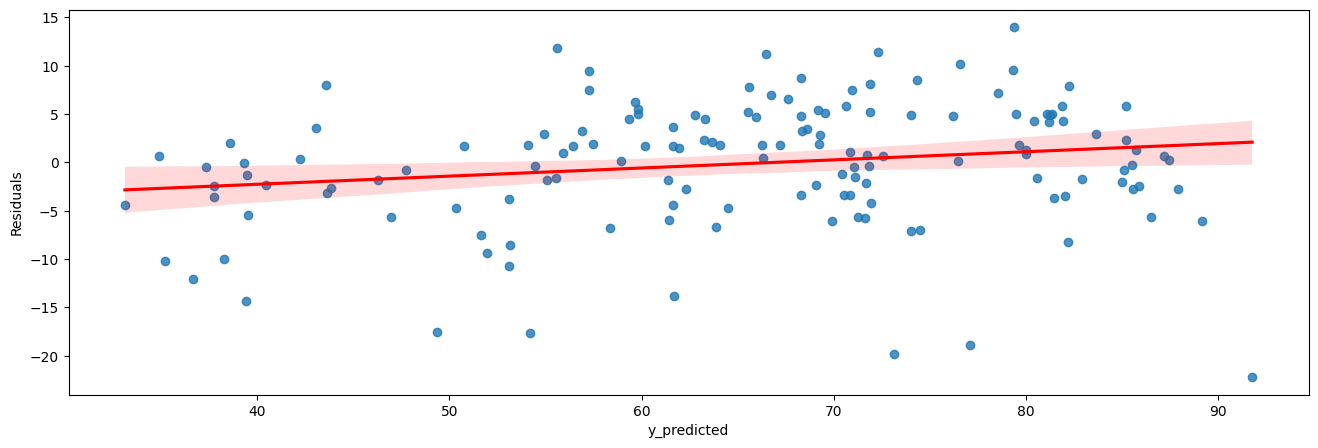

In [356]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x = y_pred,y = y_test-y_pred,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

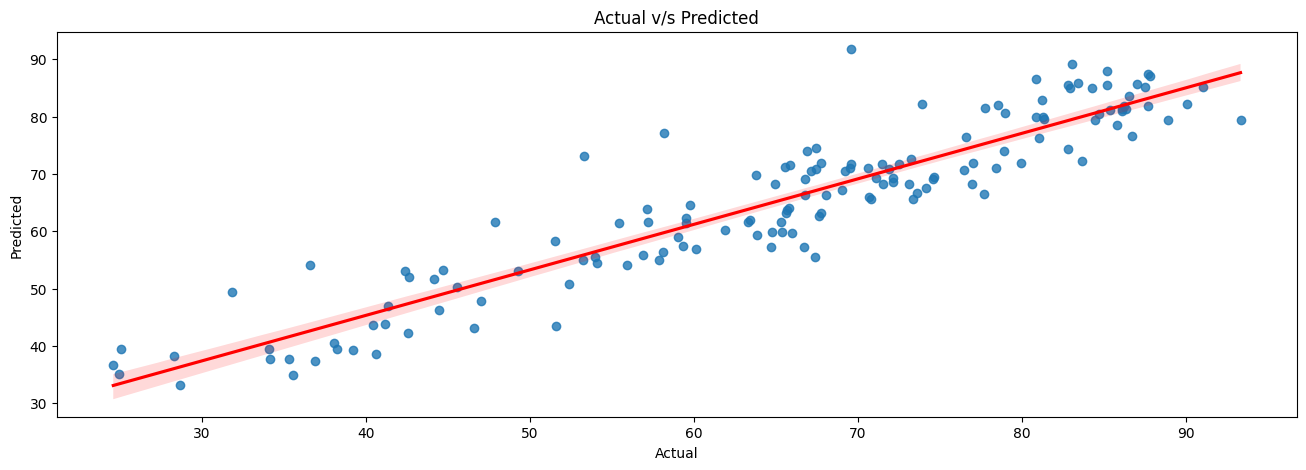

In [357]:
# Checking how predicted values and actual values are close  to the regression line
plot_scatter(y_pred,y_test)

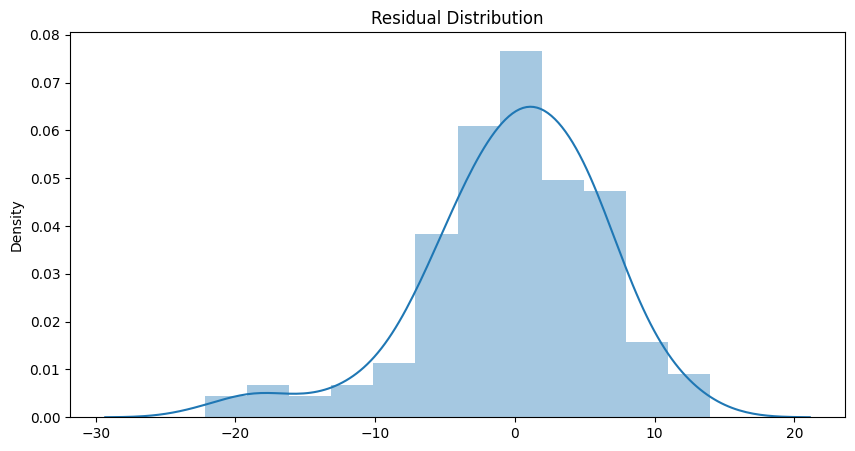

In [358]:
# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed)
Residual_distPlot(y_pred,y_test)

Predictions are fairly accurate.

Errors are normally distributed (a key assumption in regression).

No major signs of bias or heteroscedasticity.

#### Ridge

In [359]:
# Initiating
ridge_reg = Ridge(alpha = 0.01)

In [360]:
# Fitting and training the model
ridge_reg.fit(X_train,y_train)

,alpha,0.01
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


Ridge Regression penalizes large coefficients but doesn’t eliminate features (unlike Lasso).

In [361]:
# Check coefficient
ridge_reg.coef_

array([ 15.29834028,  -1.22891637,  -3.86710812,   3.01658604,
         0.95234536, -13.4627092 ,  32.68515107,  -8.56564811,
         9.11471521,   6.87575932,  12.76125338])

In [362]:
# get dataframe of x columns and Coeficients
pd.DataFrame(ridge_reg.coef_,X.columns,columns=['Coeficients'])

,Coeficients
yr,15.298340
mnth,-1.228916
holiday,-3.867108
weekday,3.016586
workingday,0.952345
weathersit,-13.462709
temp,32.685151
windspeed,-8.565648
season_2,9.114715
season_3,6.875759


In [363]:
# Check intercept
ridge_reg.intercept_

np.float64(36.95725610376581)

In [364]:
# Checking score
ridge_reg.score(X_train,y_train)

0.797236960755855

In [365]:
# y predictions on training dataset
y_pred_train = ridge_reg.predict(X_train)
# y predictions on test dataset
y_pred = ridge_reg.predict(X_test)

In [366]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE = mean_absolute_error(y_test,y_pred)
print(f" The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE = mean_squared_error(y_test,y_pred)
print(f" The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE = np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2 = r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

#Calculate adjusted R2 Score
adj_r2 = 1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

 The Mean Absolute Error (MAE) is 4.837402102757441.
 The Mean Squred Error(MSE) is 40.49626803020438.
The Root Mean Squared Error(RMSE) is 6.363667812685101.
The R2 Score is 0.8574356606420275.
Adjusted R2 is 0.8458193070647112.


In [367]:
test_dict = {'Model':"Ridge(GridsearchCv Tunned)",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [368]:
# Only append if model not already present
if test_dict['Model'] not in test_results_df['Model'].values:
    test_results_df = pd.concat([test_results_df, pd.DataFrame([test_dict])], ignore_index=True)
else:
    print(f" Model '{test_dict['Model']}' already exists. Skipping append.")


test_results_df

 Model 'Ridge(GridsearchCv Tunned)' already exists. Skipping append.


,Model,MAE,MSE,RMSE,R2_score,Adjusted_R2
0,Linear Regression,4.8368,40.4893,6.3631,0.8575,0.8458
1,Lasso,4.8714,41.1180,6.4123,0.8552,0.8435
2,Ridge(GridsearchCv Tunned),4.8374,40.4963,6.3637,0.8574,0.8458
3,ElasticNet(GridSearchCV-Tunned),4.8371,40.4923,6.3634,0.8574,0.8458
4,Decision Tree Regressor(GridsearchCV),4.7906,47.8474,6.9172,0.8316,0.8178
5,Random Forest Regressor,4.3044,38.5620,6.2098,0.8642,0.8532
6,Random Forest Regressor(GridsearchCV),4.3492,39.6697,6.2984,0.8603,0.8490
7,Gardient boosting Regression,4.1702,35.1333,5.9273,0.8763,0.8662


In [369]:
save_results(test_results_df)


 Results saved to model_comparison_results.pkl


In [370]:
# cross validation on Ridge regression
# creating object
ridge_rg = Ridge()

# alphas values's dictionary to pass on in Gridsearchcv 
alphas = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}

ridge_linear_reg = GridSearchCV(ridge_rg, alphas, scoring='neg_mean_squared_error', cv=4)
# fitting model
ridge_linear_reg.fit(X_train, y_train)

,estimator,Ridge()
,param_grid,"{'alpha': [1e-15, 1e-13, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,4
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,1


In [371]:
# Since it showing best parameter alpha= 1.. alpha =1 means it will be as linear regression.
print(f'The best alpha value is {ridge_linear_reg.best_params_}')
print(f'The best negative mean squred error value is {ridge_linear_reg.best_score_}')

The best alpha value is {'alpha': 1}
The best negative mean squred error value is -52.351736375146885


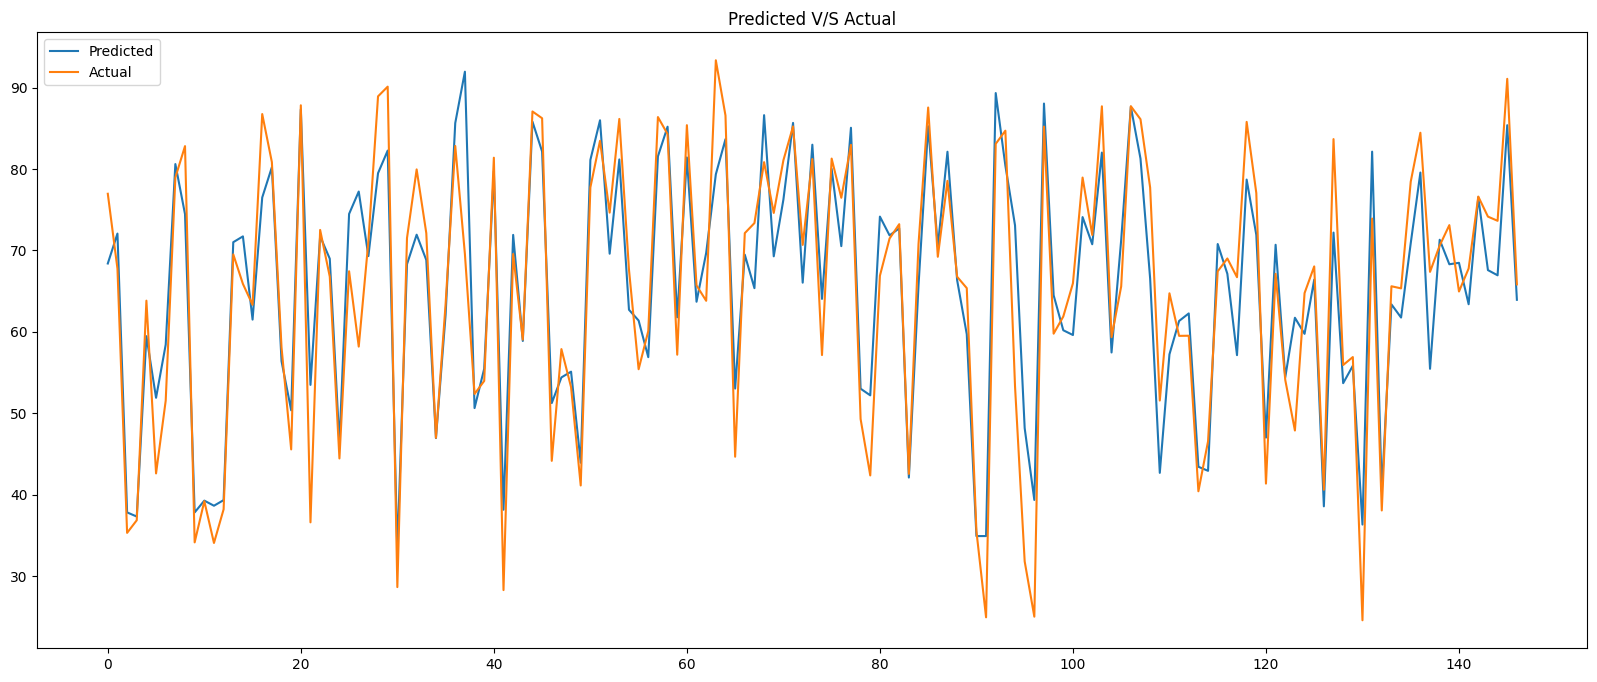

In [372]:
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

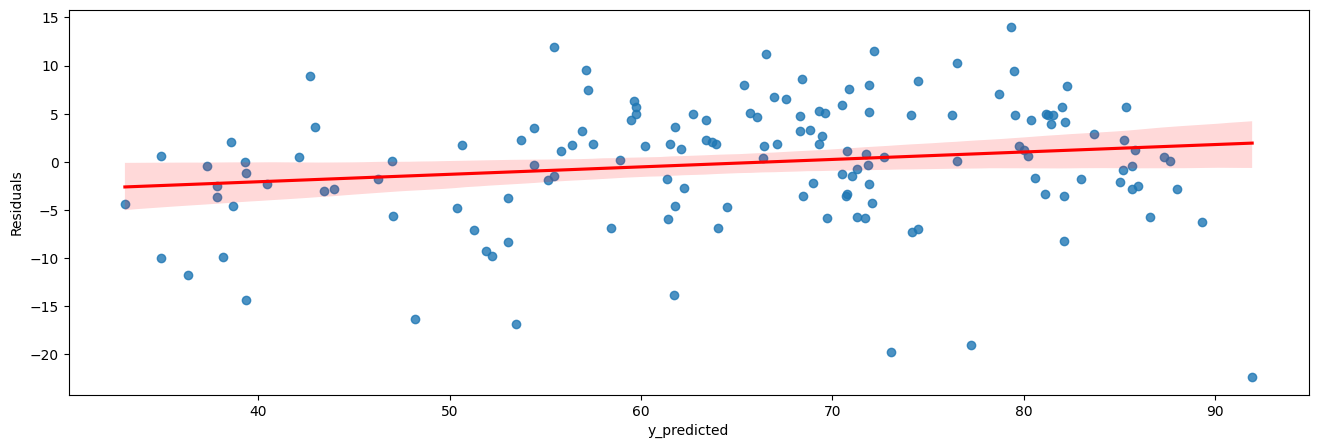

In [373]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

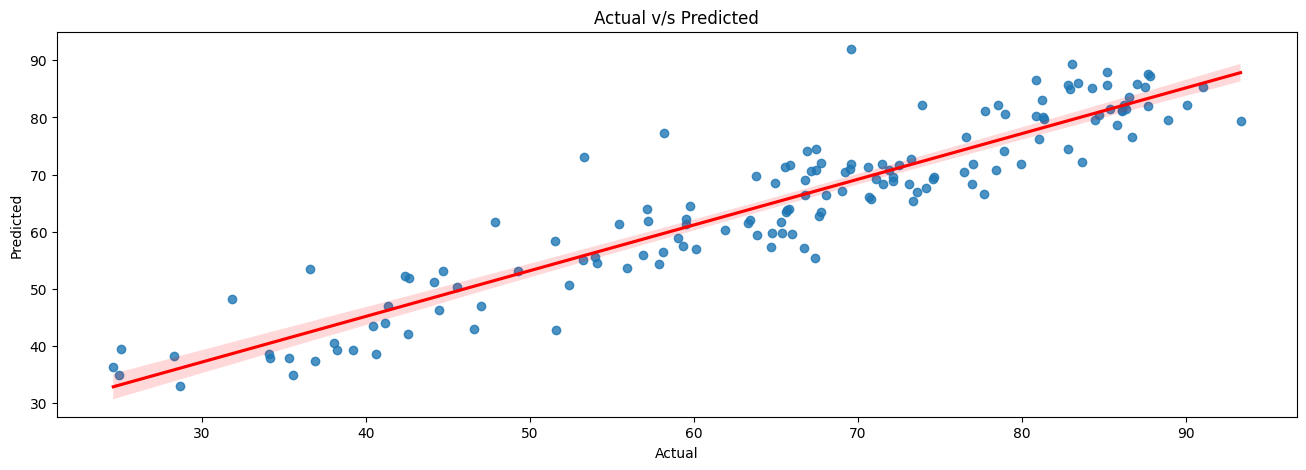

In [374]:
# Checking how predicted values and actual values are close  to the regression line
plot_scatter(y_pred,y_test)

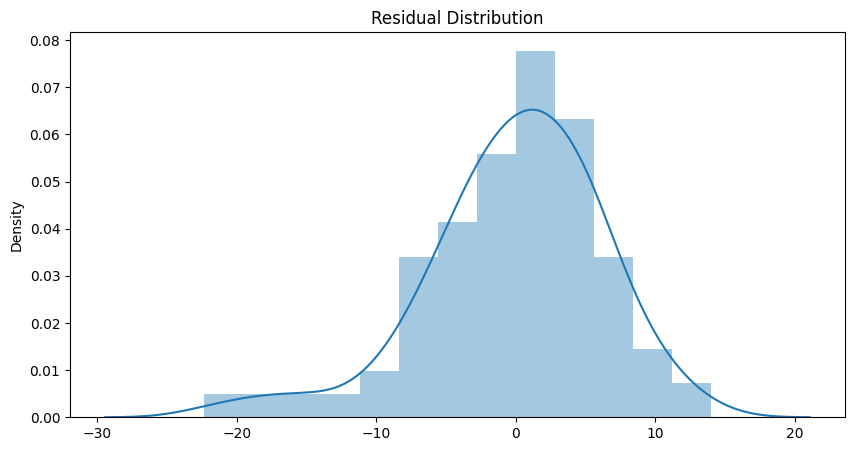

In [375]:
# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed)
Residual_distPlot(y_pred,y_test)

The residual distribution confirms that your regression model fits the data well.
Predictions are unbiased, errors are roughly normal, and model assumptions are valid.
The few outliers are natural and don’t significantly affect model performance.

#### Elastic Net

In [376]:
# creating object of elastic net
elastic_net_reg = ElasticNet(alpha = 1e-05,l1_ratio = 0.3)
elastic_net_reg.fit(X_train,y_train)

,alpha,1e-05
,l1_ratio,0.3
,fit_intercept,True
,precompute,False
,max_iter,1000
,copy_X,True
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


Parameters

| Parameter          | Meaning                                                                                                                             | What value means                                                                                              |
| ------------------ | ----------------------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------ |
| **alpha = 0.01**   | Controls the **overall strength of regularization** (how much penalty is applied). Higher α = more shrinkage, smaller coefficients. | A small α (0.01) → **mild regularization**; model keeps most coefficients nonzero (less bias).                     |
| **l1_ratio = 0.9** | Controls the **mix between L1 (Lasso)** and **L2 (Ridge)** penalties.<br>• 0 = Ridge<br>• 1 = Lasso                                 | 0.9 → Mostly **Lasso-like behavior**, meaning many coefficients are pushed toward zero (feature selection effect). |


| Parameter              | Description                                                                               | Value Meaning                        |
| ---------------------- | ----------------------------------------------------------------------------------------- | ----------------------------------------- |
| **fit_intercept=True** | Whether to calculate the intercept (bias) term.                                           | Yes → Model includes intercept.           |
| **precompute=False**   | Whether to use precomputed Gram matrix to speed up computation (used for large datasets). | False → Normal fitting; memory-efficient. |
| **max_iter=1000**      | Maximum number of iterations for optimization to converge.                                | 1000 → Standard; ensures convergence.     |
| **tol=0.0001**         | Tolerance for stopping criteria — smaller means more precise solution.                    | Normal precision setting.                 |
| **copy_X=True**        | Whether to copy input data before fitting (avoids overwriting).                           | Safe default.                             |
| **warm_start=False**   | If True, reuses previous solution as initialization for faster re-fitting.                | False → Fit fresh every time.             |


In [377]:
# check score on test data
elastic_net_reg.score(X_test,y_test)

0.8574495757548241

In [378]:
# predicting Y train values from train data set
y_pred_train = elastic_net_reg.predict(X_train)
# predicting y values from test data
y_pred = elastic_net_reg.predict(X_test)

In [379]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE= mean_absolute_error(y_test,y_pred)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE=mean_squared_error(y_test,y_pred)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE=np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2=r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

#Calculate adjusted R2 Score
adj_r2 = 1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

The Mean Absolute Error (MAE) is 4.83705567595847.
The Mean Squred Error(MSE) is 40.49231535774774.
The Root Mean Squared Error(RMSE) is 6.363357239519697.
The R2 Score is 0.8574495757548241.
Adjusted R2 is 0.8458343560015134.


In [380]:
test_dict = {'Model':"ElasticNet(GridSearchCV-Tunned)",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [381]:
# Only append if model not already present
if test_dict['Model'] not in test_results_df['Model'].values:
    test_results_df = pd.concat([test_results_df, pd.DataFrame([test_dict])], ignore_index=True)
else:
    print(f" Model '{test_dict['Model']}' already exists. Skipping append.")


test_results_df

 Model 'ElasticNet(GridSearchCV-Tunned)' already exists. Skipping append.


,Model,MAE,MSE,RMSE,R2_score,Adjusted_R2
0,Linear Regression,4.8368,40.4893,6.3631,0.8575,0.8458
1,Lasso,4.8714,41.1180,6.4123,0.8552,0.8435
2,Ridge(GridsearchCv Tunned),4.8374,40.4963,6.3637,0.8574,0.8458
3,ElasticNet(GridSearchCV-Tunned),4.8371,40.4923,6.3634,0.8574,0.8458
4,Decision Tree Regressor(GridsearchCV),4.7906,47.8474,6.9172,0.8316,0.8178
5,Random Forest Regressor,4.3044,38.5620,6.2098,0.8642,0.8532
6,Random Forest Regressor(GridsearchCV),4.3492,39.6697,6.2984,0.8603,0.8490
7,Gardient boosting Regression,4.1702,35.1333,5.9273,0.8763,0.8662


In [382]:
save_results(test_results_df)


 Results saved to model_comparison_results.pkl


In [383]:
# Cross validation

elastic = ElasticNet()
alpha_l1 = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
elastic_regressor = GridSearchCV(elastic, alpha_l1, scoring='neg_mean_squared_error',cv=4)
elastic_regressor.fit(X_train, y_train)

,estimator,ElasticNet()
,param_grid,"{'alpha': [1e-15, 1e-13, ...], 'l1_ratio': [0.1, 0.2, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,4
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,0.01


In [384]:
# print best parameters and best score
print(f'The best alpha value is {elastic_regressor.best_params_}')
print(f'The best negative mean squred error value is {elastic_regressor.best_score_}')

The best alpha value is {'alpha': 0.01, 'l1_ratio': 0.9}
The best negative mean squred error value is -52.271717567981156


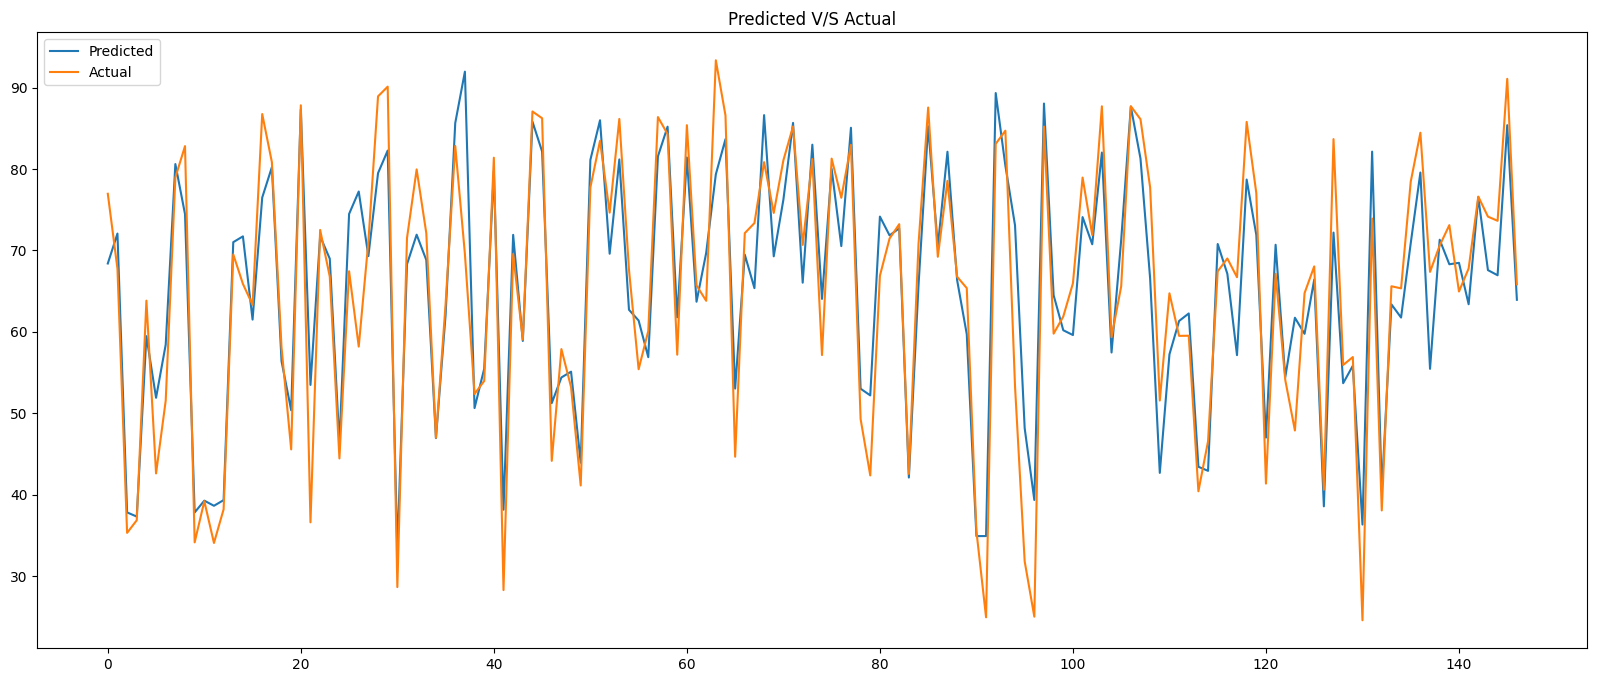

In [385]:
# plotting predicted v/s actual
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

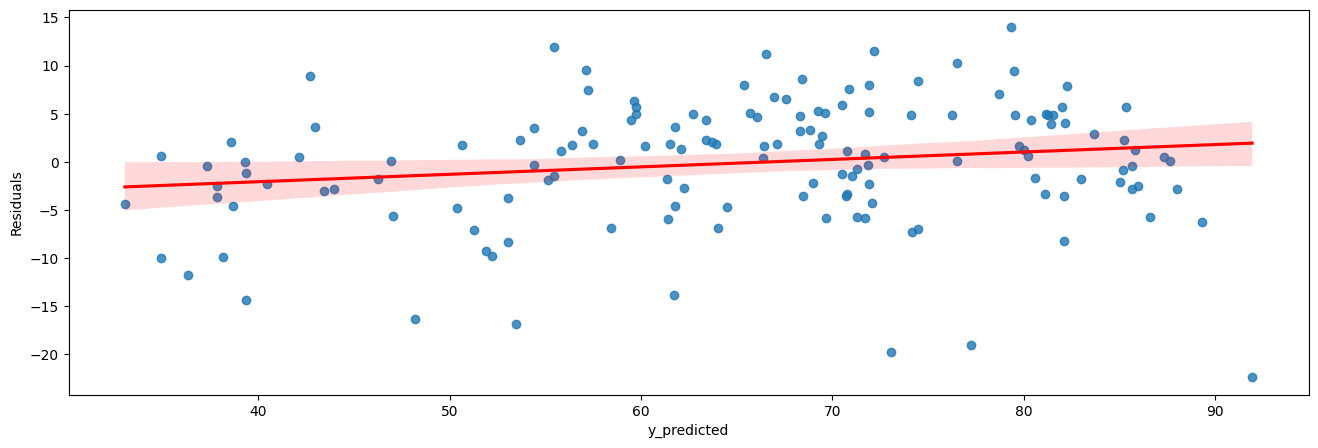

In [386]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

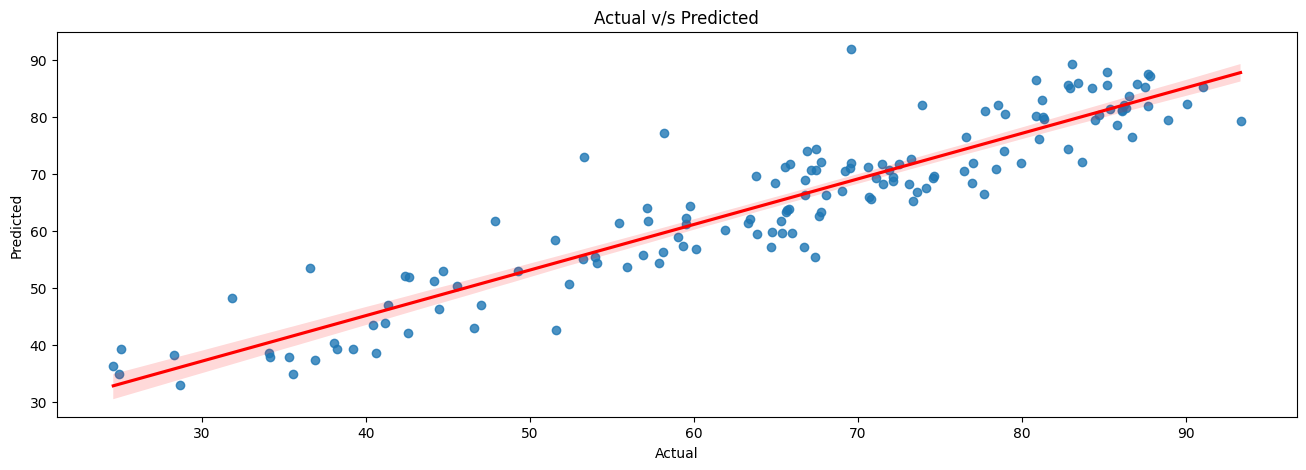

In [387]:
# Checking how predicted values and actual values are close  to the regression line
plot_scatter(y_pred,y_test)

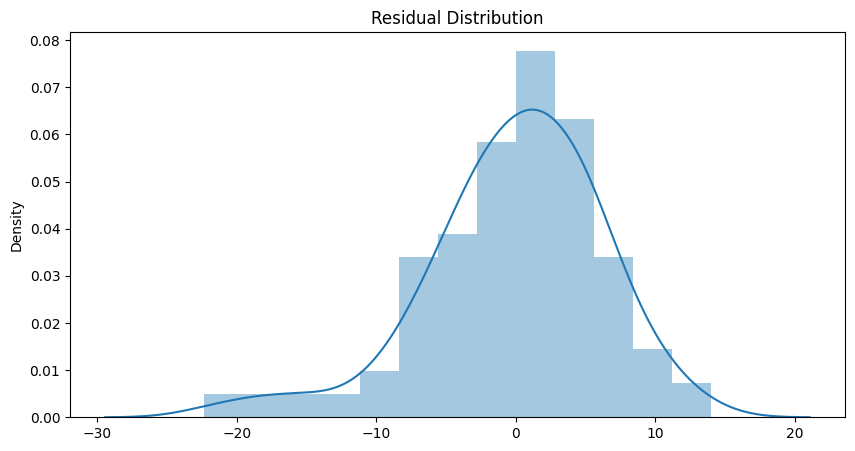

In [388]:
# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed)
Residual_distPlot(y_pred,y_test)

Residuals are normally distributed, confirming a well-fitted linear model.

#### Decision Tree Regressor

In [389]:
from sklearn.tree import DecisionTreeRegressor

# create an object (correct syntax)
D_tree = DecisionTreeRegressor(
    max_depth=9,
    splitter='best',
    max_features=None,   # or 'sqrt' / 'log2' — not 'auto'
    random_state=42
)

# fit the model
D_tree.fit(X_train, y_train)


,criterion,'squared_error'
,splitter,'best'
,max_depth,9
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [390]:
# check score on Test dataset.
D_tree.score(X_test,y_test)

0.83155662417283

In [391]:
#  predicting y_train_predictions from  X train values
y_pred_train = D_tree.predict(X_train)
#  predicting y_predictions from  X test values
y_pred = D_tree.predict(X_test)

In [392]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE = mean_absolute_error(y_test,y_pred)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE = mean_squared_error(y_test,y_pred)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE = np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2 = r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

#Calculate adjusted R2 Score
adj_r2 = 1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

The Mean Absolute Error (MAE) is 4.7905519041594316.
The Mean Squred Error(MSE) is 47.84736580079458.
The Root Mean Squared Error(RMSE) is 6.917179034895264.
The R2 Score is 0.83155662417283.
Adjusted R2 is 0.8178316083646903.


In [393]:
test_dict = {'Model':"Decision Tree Regressor(GridsearchCV)",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [394]:
# Only append if model not already present
if test_dict['Model'] not in test_results_df['Model'].values:
    test_results_df = pd.concat([test_results_df, pd.DataFrame([test_dict])], ignore_index=True)
else:
    print(f" Model '{test_dict['Model']}' already exists. Skipping append.")


test_results_df

 Model 'Decision Tree Regressor(GridsearchCV)' already exists. Skipping append.


,Model,MAE,MSE,RMSE,R2_score,Adjusted_R2
0,Linear Regression,4.8368,40.4893,6.3631,0.8575,0.8458
1,Lasso,4.8714,41.1180,6.4123,0.8552,0.8435
2,Ridge(GridsearchCv Tunned),4.8374,40.4963,6.3637,0.8574,0.8458
3,ElasticNet(GridSearchCV-Tunned),4.8371,40.4923,6.3634,0.8574,0.8458
4,Decision Tree Regressor(GridsearchCV),4.7906,47.8474,6.9172,0.8316,0.8178
5,Random Forest Regressor,4.3044,38.5620,6.2098,0.8642,0.8532
6,Random Forest Regressor(GridsearchCV),4.3492,39.6697,6.2984,0.8603,0.8490
7,Gardient boosting Regression,4.1702,35.1333,5.9273,0.8763,0.8662


In [395]:
save_results(test_results_df)


 Results saved to model_comparison_results.pkl


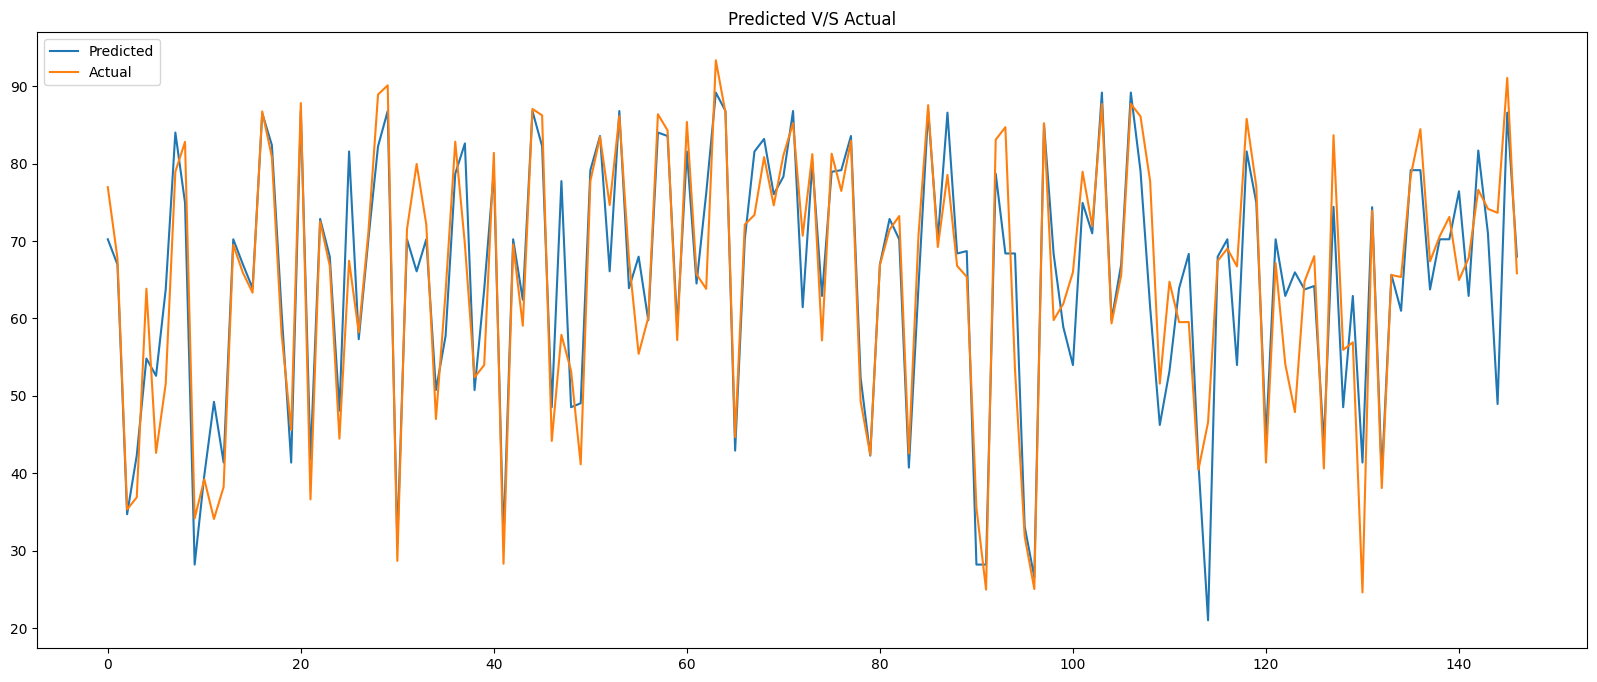

In [396]:
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

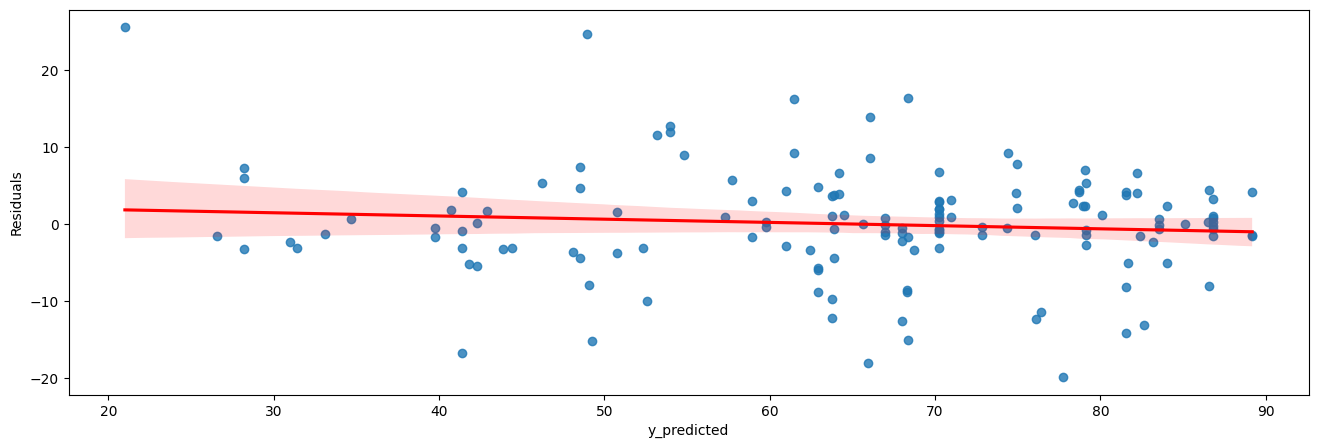

In [397]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

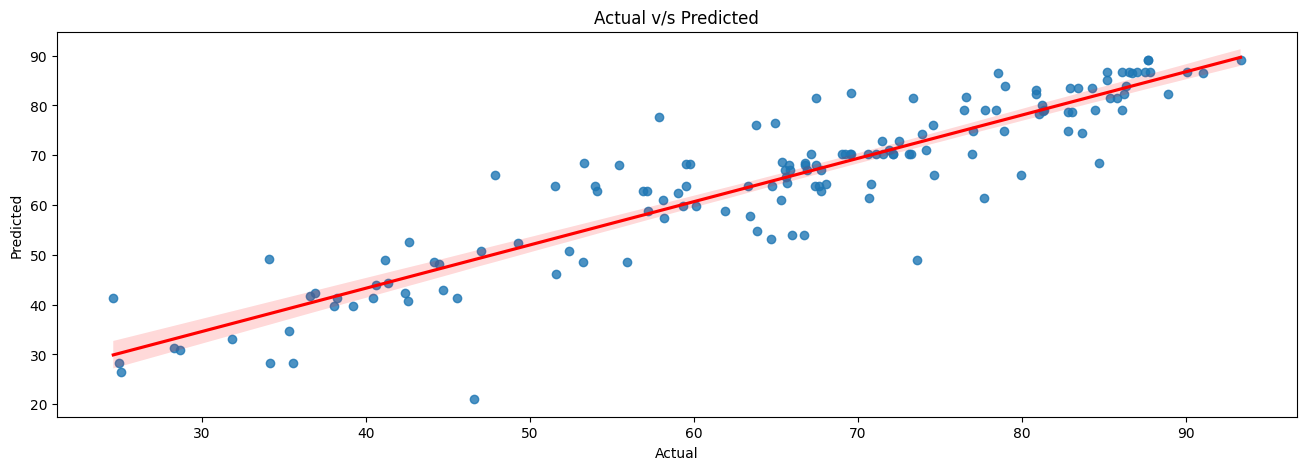

In [398]:
# Checking how predicted values and actual values are close  to the regression line
plot_scatter(y_pred,y_test)

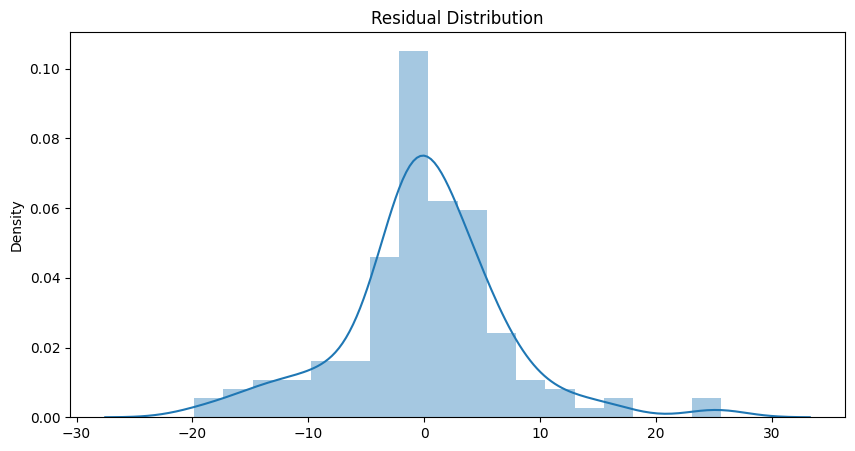

In [399]:
# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed)
Residual_distPlot(y_pred,y_test)

In [400]:
# Hyper parameters range intialization for tuning 
tree = DecisionTreeRegressor(random_state=42)

parameters = {
    'criterion': ['squared_error', 'absolute_error'],
    'splitter': ['best', 'random'],
    'max_depth': [3, 5, 7, 9, None],
    'max_features': [None, 'log2']
}

In [401]:
tuning_model = GridSearchCV(tree,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=0)
tuning_model.fit(X_train,y_train)

,estimator,DecisionTreeR...ndom_state=42)
,param_grid,"{'criterion': ['squared_error', 'absolute_error'], 'max_depth': [3, 5, ...], 'max_features': [None, 'log2'], 'splitter': ['best', 'random']}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'squared_error'


In [402]:
# print best parameters and best score
print(f'The best parameter is {tuning_model.best_params_}')
print(f'The best negative mean squred error value is {tuning_model.best_score_}')

The best parameter is {'criterion': 'squared_error', 'max_depth': 5, 'max_features': None, 'splitter': 'best'}
The best negative mean squred error value is -57.51138343854662


In [403]:
D_tree = DecisionTreeRegressor(
    max_depth=9,
    splitter='best',
    max_features=None,   # or 'sqrt' / 'log2' — not 'auto'
    random_state=42
)

# fit the model
D_tree.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,9
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


Text(0.5, 0, 'Relative Importance')

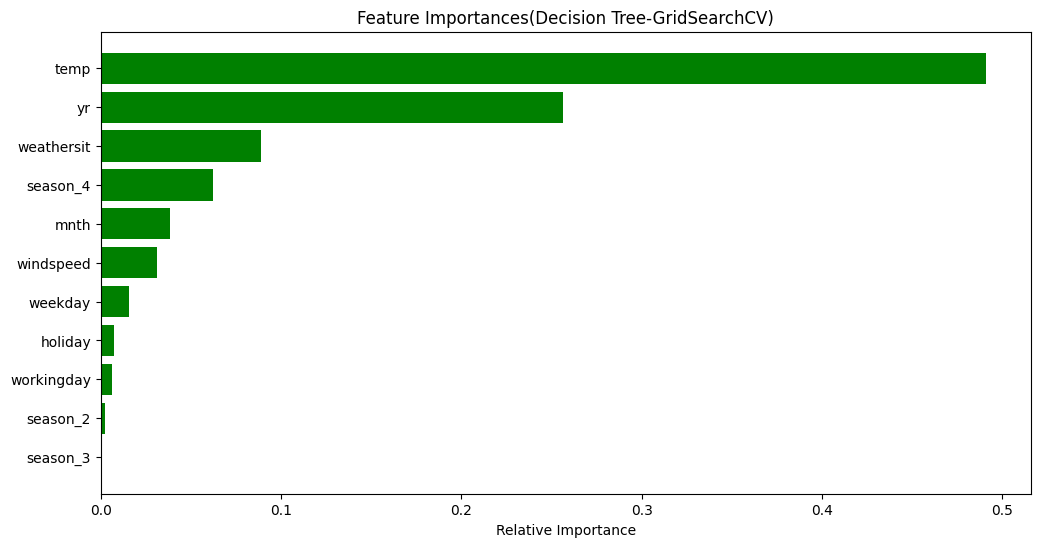

In [404]:
imp_variables=X.columns
importances = D_tree.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,6))
plt.title('Feature Importances(Decision Tree-GridSearchCV)')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), imp_variables[indices])
plt.xlabel('Relative Importance')

#### Random Forest Regressor

In [405]:
# create an object
rf = RandomForestRegressor()

# fitting Xtrain yTrain
rf.fit(X_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [406]:
rf.score(X_test,y_test)

0.8627675383813759

In [407]:
y_pred_train = rf.predict(X_train)
y_pred = rf.predict(X_test)

In [408]:
# Evaluation of Test data set

# Calculate Mean Absolute Error.
MAE = mean_absolute_error(y_test,y_pred)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

# Calculate  Mean Squared Error
MSE = mean_squared_error(y_test,y_pred)
print(f"The Mean Squred Error(MSE) is {MSE}.")

# Calculate Root Mean Squared Error
RMSE = np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

# Calculate R2 Score
R2 = r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

# Calculate adjusted R2 Score
adj_r2 = 1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

The Mean Absolute Error (MAE) is 4.339871916308733.
The Mean Squred Error(MSE) is 38.981715716425796.
The Root Mean Squared Error(RMSE) is 6.24353391249105.
The R2 Score is 0.8627675383813759.
Adjusted R2 is 0.8515856341013398.


In [409]:
test_dict = {'Model':"Random Forest Regressor",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [410]:
# Only append if model not already present
if test_dict['Model'] not in test_results_df['Model'].values:
    test_results_df = pd.concat([test_results_df, pd.DataFrame([test_dict])], ignore_index=True)
else:
    print(f" Model '{test_dict['Model']}' already exists. Skipping append.")


test_results_df

 Model 'Random Forest Regressor' already exists. Skipping append.


,Model,MAE,MSE,RMSE,R2_score,Adjusted_R2
0,Linear Regression,4.8368,40.4893,6.3631,0.8575,0.8458
1,Lasso,4.8714,41.1180,6.4123,0.8552,0.8435
2,Ridge(GridsearchCv Tunned),4.8374,40.4963,6.3637,0.8574,0.8458
3,ElasticNet(GridSearchCV-Tunned),4.8371,40.4923,6.3634,0.8574,0.8458
4,Decision Tree Regressor(GridsearchCV),4.7906,47.8474,6.9172,0.8316,0.8178
5,Random Forest Regressor,4.3044,38.5620,6.2098,0.8642,0.8532
6,Random Forest Regressor(GridsearchCV),4.3492,39.6697,6.2984,0.8603,0.8490
7,Gardient boosting Regression,4.1702,35.1333,5.9273,0.8763,0.8662


In [411]:
save_results(test_results_df)


 Results saved to model_comparison_results.pkl


#### GridSearchCV Random Forest

In [412]:
param = {'n_estimators':[25,50,40,80,100],'max_depth':[3,4,5,6,7,8,9]}

In [413]:
rf_reg = RandomForestRegressor()
rf_tuning = GridSearchCV(rf_reg,param_grid=param,scoring='neg_mean_squared_error',cv=5)
rf_tuning.fit(X_train,y_train)

,estimator,RandomForestRegressor()
,param_grid,"{'max_depth': [3, 4, ...], 'n_estimators': [25, 50, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [414]:
# print best parameters and best score
print(f'The best parameter is {rf_tuning.best_params_}')
print(f'The best negative mean squred error value is {rf_tuning.best_score_}')

The best parameter is {'max_depth': 9, 'n_estimators': 100}
The best negative mean squred error value is -43.008231825163115


In [415]:
rf_rg = RandomForestRegressor(max_depth= 9, n_estimators= 80)
rf_rg.fit(X_train,y_train)

,n_estimators,80
,criterion,'squared_error'
,max_depth,9
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [416]:
rf_rg.score(X_test,y_test)

0.8634615229052756

In [417]:
y_pred_train = rf_rg.predict(X_train)
y_pred = rf_rg.predict(X_test)

In [418]:
# Evaluation of Test data set

# Calculate Mean Absolute Error.
MAE = mean_absolute_error(y_test,y_pred)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

# Calculate  Mean Squared Error
MSE = mean_squared_error(y_test,y_pred)
print(f"The Mean Squred Error(MSE) is {MSE}.")

# Calculate Root Mean Squared Error
RMSE = np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

# Calculate R2 Score
R2 = r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

# Calculate adjusted R2 Score
adj_r2 = 1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

The Mean Absolute Error (MAE) is 4.304670816377722.
The Mean Squred Error(MSE) is 38.7845851898494.
The Root Mean Squared Error(RMSE) is 6.227727128724363.
The R2 Score is 0.8634615229052756.
Adjusted R2 is 0.8523361655123721.


In [419]:
test_dict = {'Model':"Random Forest Regressor(GridsearchCV)",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [420]:
# Only append if model not already present
if test_dict['Model'] not in test_results_df['Model'].values:
    test_results_df = pd.concat([test_results_df, pd.DataFrame([test_dict])], ignore_index=True)
else:
    print(f" Model '{test_dict['Model']}' already exists. Skipping append.")


test_results_df

 Model 'Random Forest Regressor(GridsearchCV)' already exists. Skipping append.


,Model,MAE,MSE,RMSE,R2_score,Adjusted_R2
0,Linear Regression,4.8368,40.4893,6.3631,0.8575,0.8458
1,Lasso,4.8714,41.1180,6.4123,0.8552,0.8435
2,Ridge(GridsearchCv Tunned),4.8374,40.4963,6.3637,0.8574,0.8458
3,ElasticNet(GridSearchCV-Tunned),4.8371,40.4923,6.3634,0.8574,0.8458
4,Decision Tree Regressor(GridsearchCV),4.7906,47.8474,6.9172,0.8316,0.8178
5,Random Forest Regressor,4.3044,38.5620,6.2098,0.8642,0.8532
6,Random Forest Regressor(GridsearchCV),4.3492,39.6697,6.2984,0.8603,0.8490
7,Gardient boosting Regression,4.1702,35.1333,5.9273,0.8763,0.8662


In [421]:
save_results(test_results_df)


 Results saved to model_comparison_results.pkl


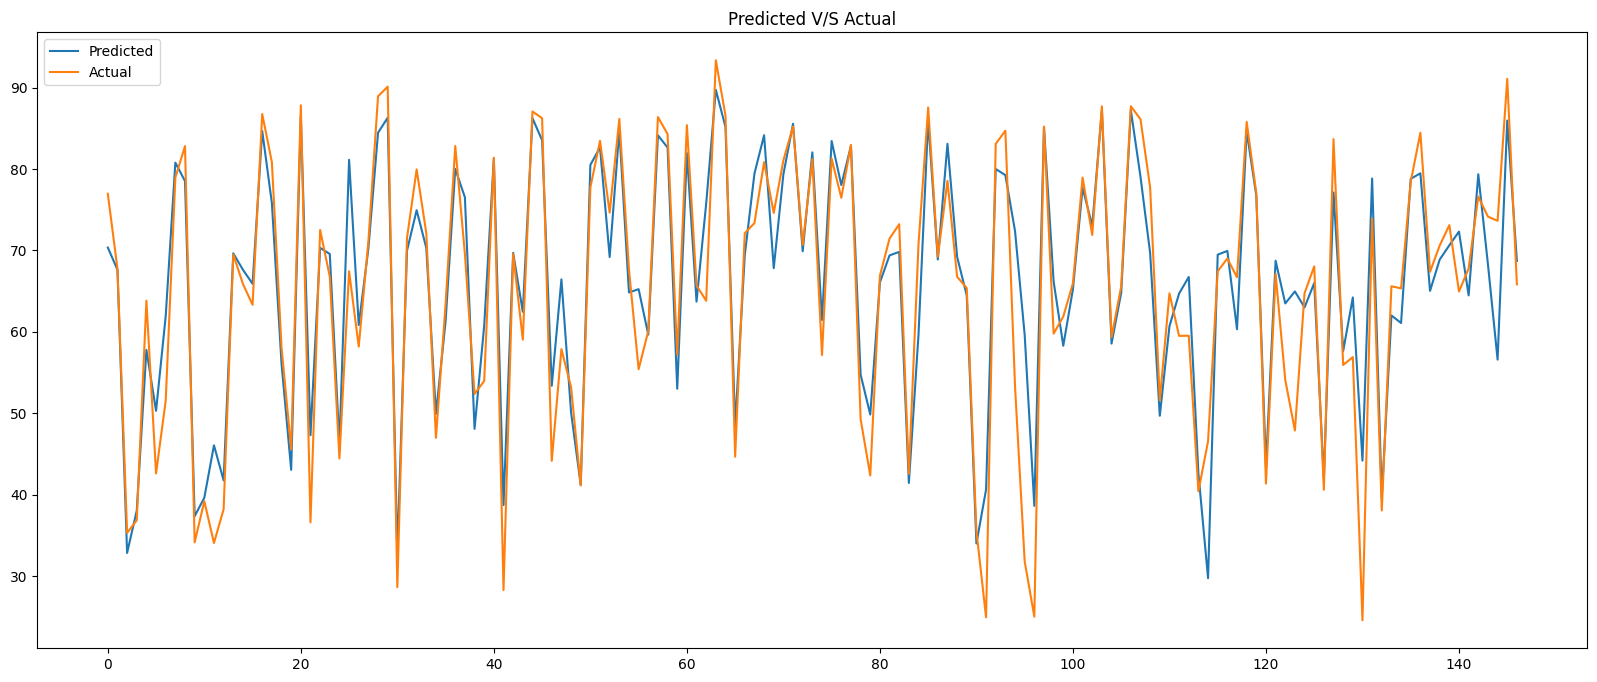

In [422]:
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

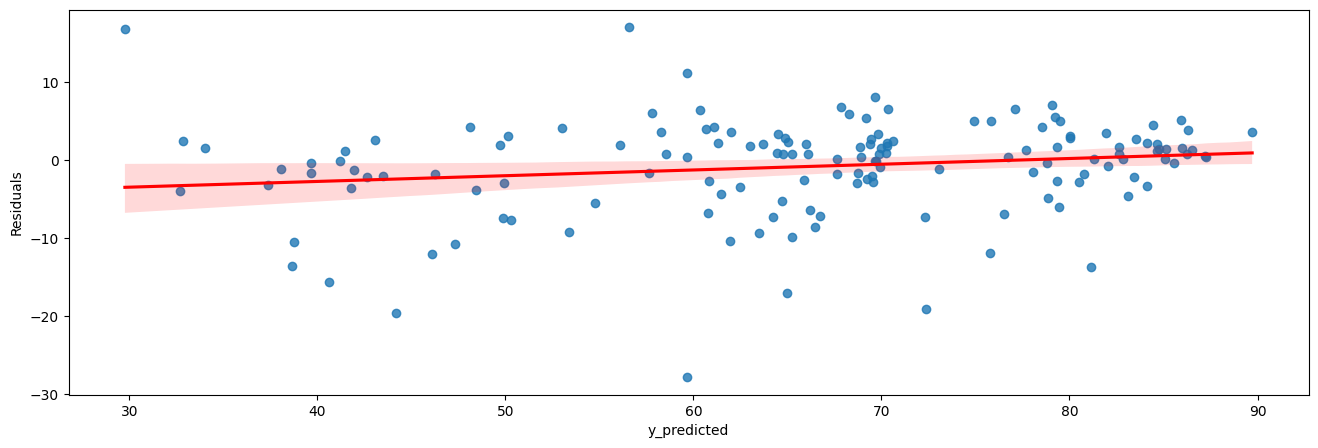

In [423]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

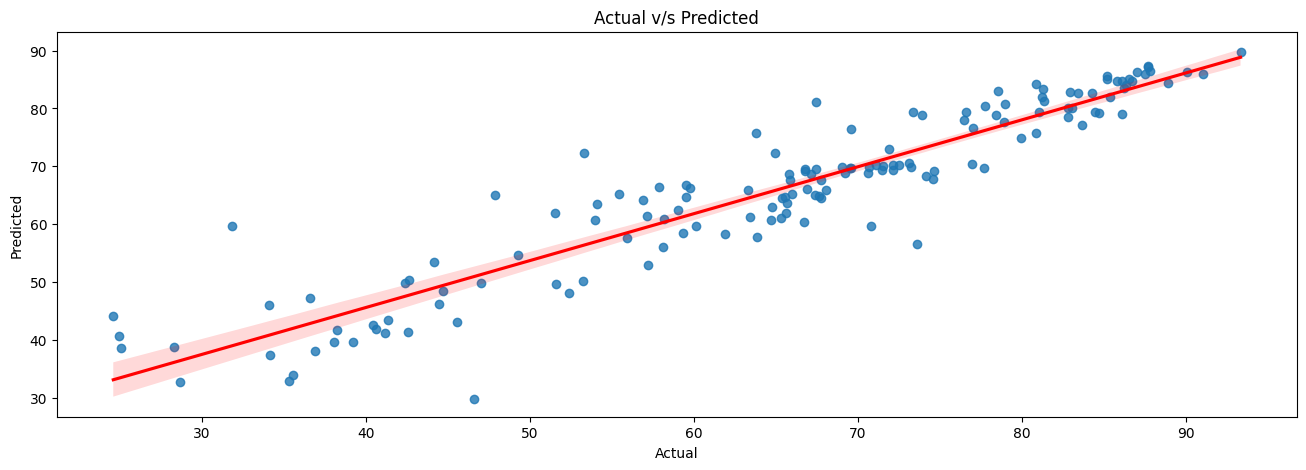

In [424]:
# Checking how predicted values and actual values are close  to the regression line
plot_scatter(y_pred,y_test)

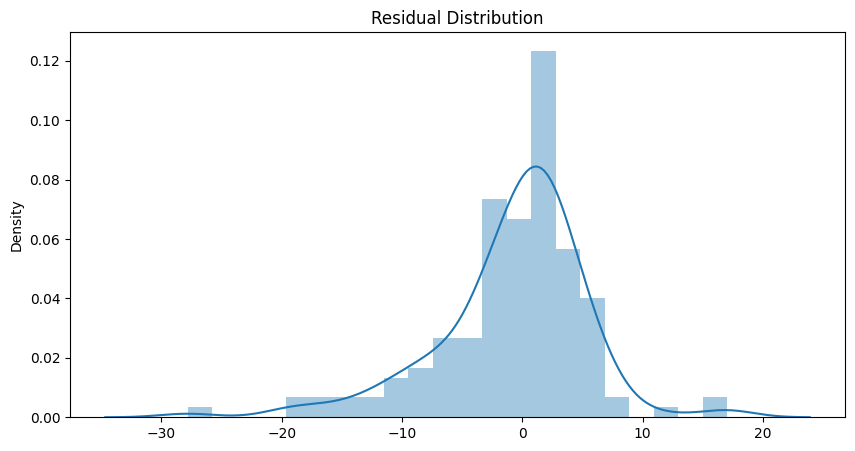

In [425]:
# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed)
Residual_distPlot(y_pred,y_test)

Text(0.5, 0, 'Relative Importance')

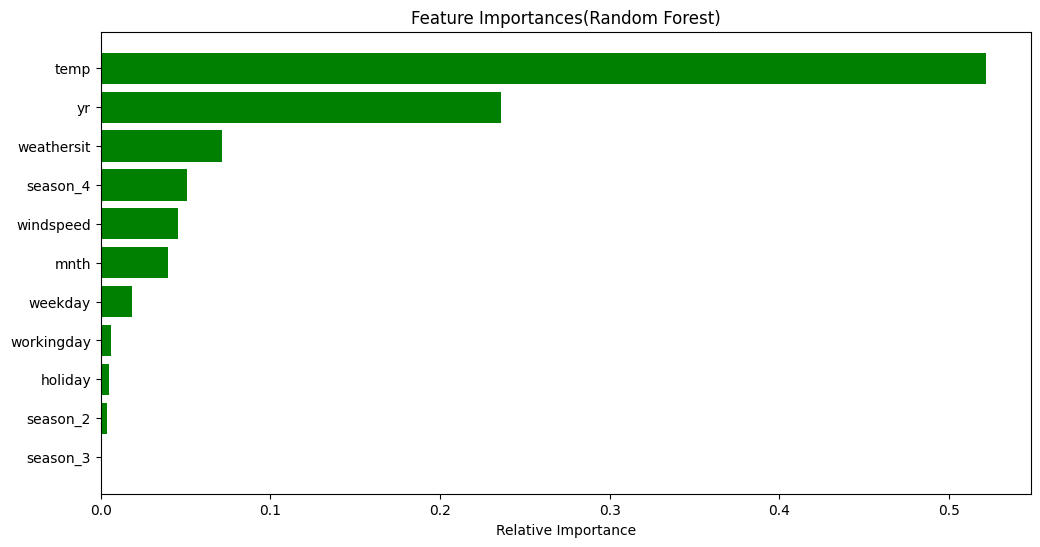

In [426]:
imp_variables=X.columns
importances = rf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,6))
plt.title('Feature Importances(Random Forest)')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), imp_variables[indices])
plt.xlabel('Relative Importance')

#### Gradient Boosting

In [427]:
from sklearn.ensemble import GradientBoostingRegressor

gradboo_reg = GradientBoostingRegressor()
gradboo_reg.fit(X_train,y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [428]:
gradboo_reg.score(X_test,y_test)

0.8745375872762908

In [429]:
y_pred_train = gradboo_reg.predict(X_train)
y_pred = gradboo_reg.predict(X_test)

In [430]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE = mean_absolute_error(y_test,y_pred)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE = mean_squared_error(y_test,y_pred)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE = np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2 = r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

#Calculate adjusted R2 Score
adj_r2 = 1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

The Mean Absolute Error (MAE) is 4.174766728600936.
The Mean Squred Error(MSE) is 35.63836171272745.
The Root Mean Squared Error(RMSE) is 5.9697874093410945.
The R2 Score is 0.8745375872762908.
Adjusted R2 is 0.8643147240173219.


In [431]:
test_dict = {'Model':"Gardient boosting Regression",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [432]:
# Only append if model not already present
if test_dict['Model'] not in test_results_df['Model'].values:
    test_results_df = pd.concat([test_results_df, pd.DataFrame([test_dict])], ignore_index=True)
else:
    print(f" Model '{test_dict['Model']}' already exists. Skipping append.")


test_results_df

 Model 'Gardient boosting Regression' already exists. Skipping append.


,Model,MAE,MSE,RMSE,R2_score,Adjusted_R2
0,Linear Regression,4.8368,40.4893,6.3631,0.8575,0.8458
1,Lasso,4.8714,41.1180,6.4123,0.8552,0.8435
2,Ridge(GridsearchCv Tunned),4.8374,40.4963,6.3637,0.8574,0.8458
3,ElasticNet(GridSearchCV-Tunned),4.8371,40.4923,6.3634,0.8574,0.8458
4,Decision Tree Regressor(GridsearchCV),4.7906,47.8474,6.9172,0.8316,0.8178
5,Random Forest Regressor,4.3044,38.5620,6.2098,0.8642,0.8532
6,Random Forest Regressor(GridsearchCV),4.3492,39.6697,6.2984,0.8603,0.8490
7,Gardient boosting Regression,4.1702,35.1333,5.9273,0.8763,0.8662


In [433]:
save_results(test_results_df)


 Results saved to model_comparison_results.pkl


#### Grid SearchCV on Gradient Boosting Regressor

In [434]:
gbr = GradientBoostingRegressor()

In [435]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
              'subsample'    : [0.9, 0.5, 0.2, 0.1],
              'n_estimators' : [50,80,100,150],
               'max_depth'    : [4,6,8,10]}

In [436]:
#Gridsearch
grad_boo_tuning = GridSearchCV(gbr,param_grid=parameters,cv=4,n_jobs=1)
# fitting gridsearc on xtrain and ytrain
grad_boo_tuning.fit(X_train,y_train)

,estimator,GradientBoostingRegressor()
,param_grid,"{'learning_rate': [0.01, 0.02, ...], 'max_depth': [4, 6, ...], 'n_estimators': [50, 80, ...], 'subsample': [0.9, 0.5, ...]}"
,scoring,None
,n_jobs,1
,refit,True
,cv,4
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,loss,'squared_error'


In [437]:
# print best parameters and best score
print(f'The best parameter is {grad_boo_tuning.best_params_}')
print(f'The best negative mean squred error value is {grad_boo_tuning.best_score_}')

The best parameter is {'learning_rate': 0.03, 'max_depth': 8, 'n_estimators': 150, 'subsample': 0.2}
The best negative mean squred error value is 0.8493591447149792


In [438]:
# Using best paramters tunned by GridsearchCv 
grad_tuned = GradientBoostingRegressor(learning_rate=0.04,max_depth=10,n_estimators=150,subsample=0.5)
grad_tuned.fit(X_train,y_train)

,loss,'squared_error'
,learning_rate,0.04
,n_estimators,150
,subsample,0.5
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,10
,min_impurity_decrease,0.0
,init,None


In [439]:
#checking score on test data
grad_tuned.score(X_test,y_test)

0.8718203110319878

In [440]:
# predicting y values of train and test data.
#  y preidictions on train data.
y_pred_train = grad_tuned.predict(X_train)
# y predictions on test data
y_pred = grad_tuned.predict(X_test)

In [441]:
# Evaluation of Test data set

#Calculate Mean Absolute Error.
MAE = mean_absolute_error(y_test,y_pred)
print(f"The Mean Absolute Error (MAE) is {MAE}.")

#Calculate  Mean Squared Error
MSE = mean_squared_error(y_test,y_pred)
print(f"The Mean Squred Error(MSE) is {MSE}.")

#Calculate Root Mean Squared Error
RMSE = np.sqrt(MSE)
print(f"The Root Mean Squared Error(RMSE) is {RMSE}.")

#Calculate R2 Score
R2 = r2_score(y_test,y_pred)
print(f"The R2 Score is {R2}.")

#Calculate adjusted R2 Score
adj_r2 = 1-(1-r2_score(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print(f"Adjusted R2 is {adj_r2}.")

The Mean Absolute Error (MAE) is 4.153692029288729.
The Mean Squred Error(MSE) is 36.410220563243385.
The Root Mean Squared Error(RMSE) is 6.034088213081027.
The R2 Score is 0.8718203110319878.
Adjusted R2 is 0.8613760400790387.


In [449]:
test_dict = {'Model':"Gradient Boosting Regression(GridSearchCV)",
              'MAE':round(MAE,4),
              'MSE':round(MSE,4),
              'RMSE':round(RMSE,4),
              'R2_score':round(R2,4),
              'Adjusted_R2':round(adj_r2,4)}

In [450]:
# Only append if model not already present
if test_dict['Model'] not in test_results_df['Model'].values:
    test_results_df = pd.concat([test_results_df, pd.DataFrame([test_dict])], ignore_index=True)
else:
    print(f" Model '{test_dict['Model']}' already exists. Skipping append.")


test_results_df

,Model,MAE,MSE,RMSE,R2_score,Adjusted_R2
0,Linear Regression,4.8368,40.4893,6.3631,0.8575,0.8458
1,Lasso,4.8714,41.1180,6.4123,0.8552,0.8435
2,Ridge(GridsearchCv Tunned),4.8374,40.4963,6.3637,0.8574,0.8458
3,ElasticNet(GridSearchCV-Tunned),4.8371,40.4923,6.3634,0.8574,0.8458
4,Decision Tree Regressor(GridsearchCV),4.7906,47.8474,6.9172,0.8316,0.8178
5,Random Forest Regressor,4.3044,38.5620,6.2098,0.8642,0.8532
6,Random Forest Regressor(GridsearchCV),4.3492,39.6697,6.2984,0.8603,0.8490
7,Gardient boosting Regression,4.1702,35.1333,5.9273,0.8763,0.8662
8,Gradient Boosting Regression(GridSearchCV),4.1537,36.4102,6.0341,0.8718,0.8614


In [451]:
save_results(test_results_df)


 Results saved to model_comparison_results.pkl


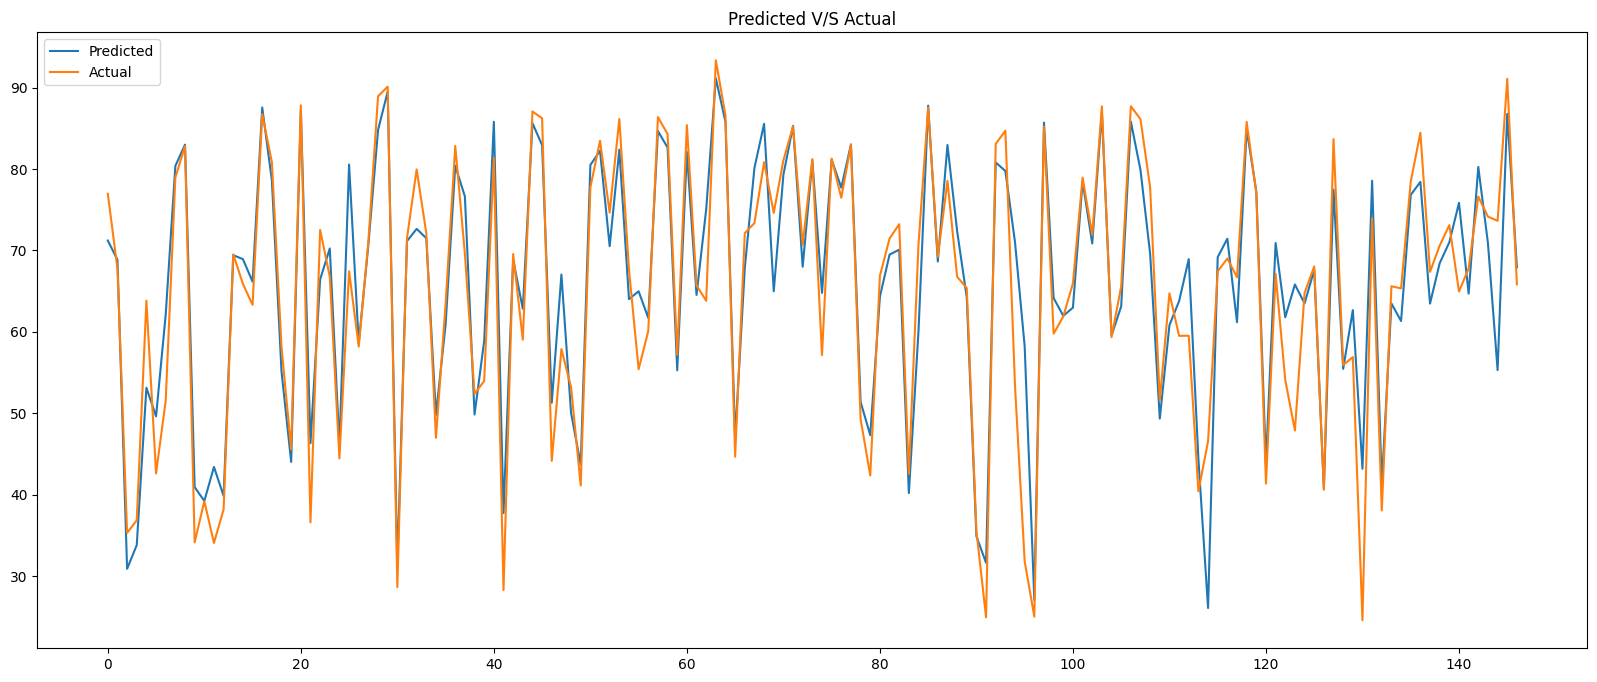

In [452]:
plot_Pred_vs_actual(y_pred,y_test)

Text(0.5, 0, 'y_predicted')

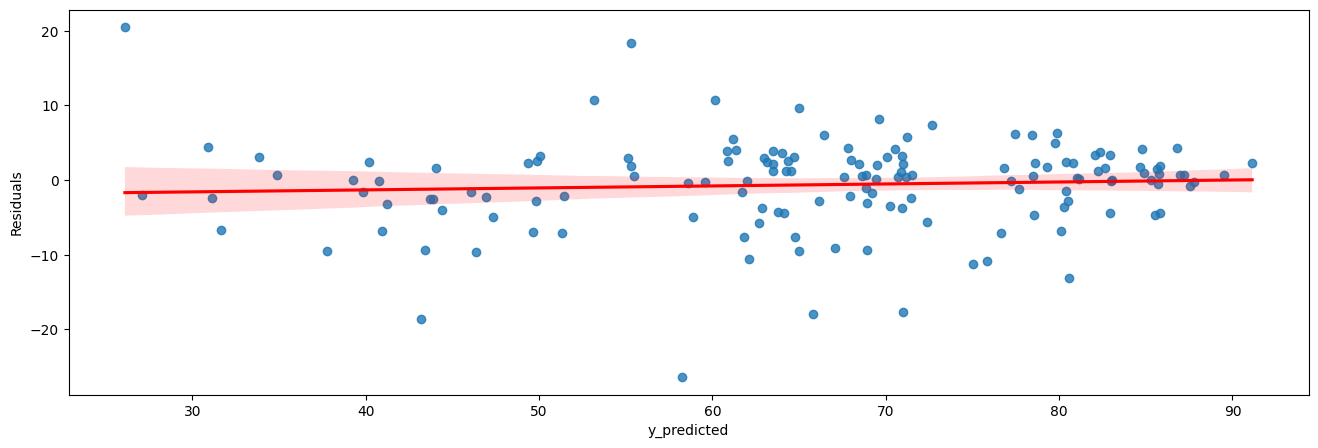

In [453]:
# Check Homoscedasticity by plotting y_predicted values and the residuals
plt.figure(figsize=(16,5))
sns.regplot(x=y_pred,y=y_test-y_pred,line_kws={'color':'red'})
plt.ylabel('Residuals')
plt.xlabel('y_predicted')

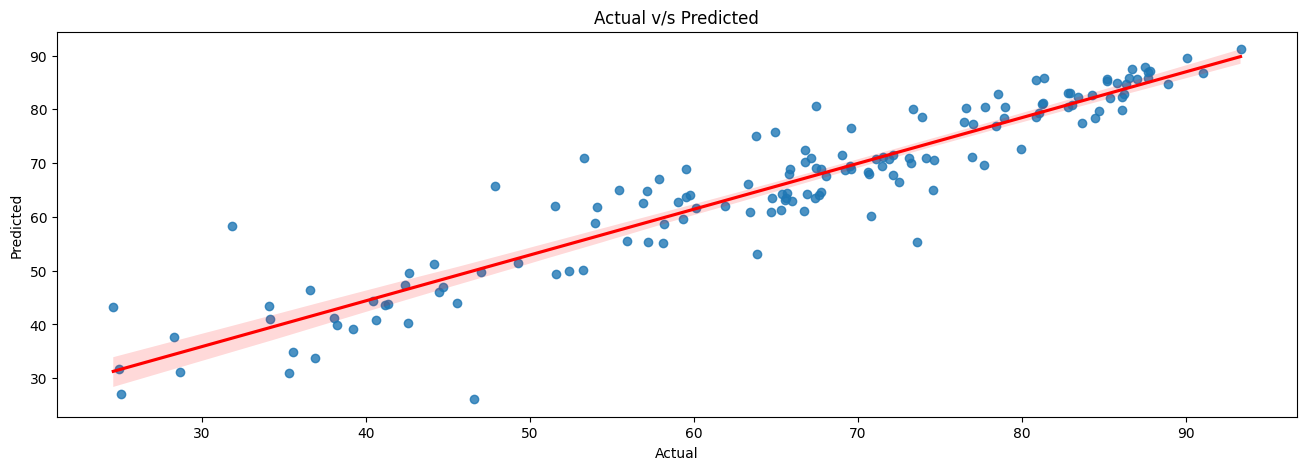

In [454]:
# Checking how predicted values and actual values are close  to the regression line
plot_scatter(y_pred,y_test)

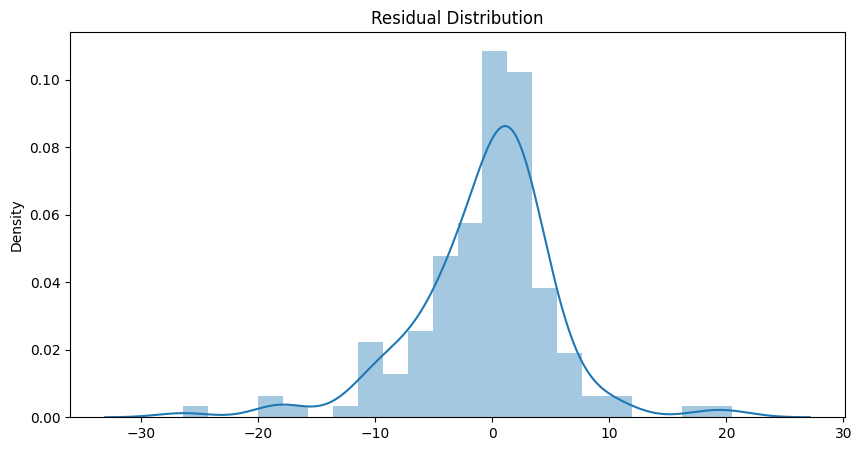

In [455]:
# Residuals of the regression are normally distributed.(Homoscedasticity refers to whether these residuals are equally distributed)
Residual_distPlot(y_pred,y_test)

Text(0.5, 0, 'Relative Importance')

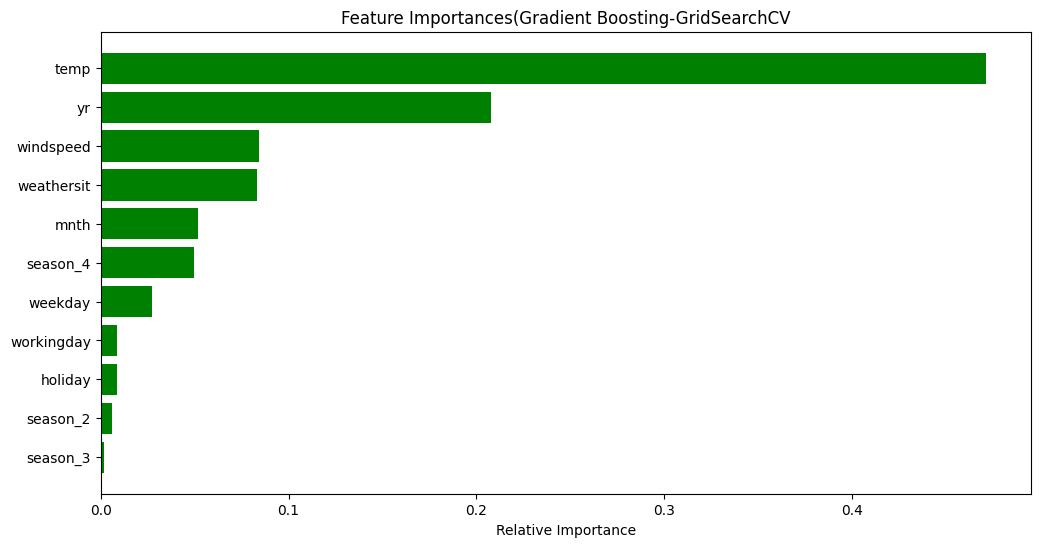

In [456]:
# checking Feature imporatance
imp_variables=X.columns
importances = grad_tuned.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,6))
plt.title('Feature Importances(Gradient Boosting-GridSearchCV')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), imp_variables[indices])
plt.xlabel('Relative Importance')

* #### As we have calculated MAE, MSE, RMS, R2_Score and  Adjusted_R2 score for each model. Based on Adjusted_R2 score will decide our model performance. 

##### Linear, Lasso, Ridge, and ElasticNet Regression
* From the above results, we can observe that the Linear Regression, Lasso, Ridge, and ElasticNet models have almost similar Adjusted R² Scores of around 84–85% on the test data.
* Even after applying GridSearchCV tuning on Ridge and ElasticNet, there was no major improvement compared to their base models.
* This indicates that the dataset exhibits strong linear relationships and the regularization terms (L1, L2) did not significantly alter the model’s predictive capability.
* Hence, these models serve as good baseline models but may not capture complex, non-linear patterns in the data.

##### Decision Tree Regressor

* After applying hyperparameter tuning using GridSearchCV, we achieved an Adjusted R² Score of approximately 81–82% on the test data.
* The performance is lower compared to the linear models, which suggests that the Decision Tree might be overfitting to training data and not generalizing well to unseen samples.
* While the interpretability of Decision Trees is good, their standalone predictive power was found to be relatively weaker in this case.

##### Random Forest Regressor
* Using the base Random Forest Regressor model, we obtained an Adjusted R² Score of around 85%, which shows strong performance and improved accuracy compared to the Decision Tree.
* However, this slightly higher score might also indicate that the model is memorizing training patterns (overfitting) to some extent.
* After applying GridSearchCV for hyperparameter tuning, we got an Adjusted R² Score of approximately 84–85%, which is still very good and indicates better generalization.
* Hence, the tuned Random Forest model strikes a good balance between bias and variance, and can be considered a robust candidate model.

##### Gradient Boosting Regression (GBR)
* The Gradient Boosting Regressor (base model) achieved an Adjusted R² Score of around 86%, demonstrating strong predictive capability even without any tuning.
* After applying GridSearchCV hyperparameter tuning, the Adjusted R² Score improved to approximately 86–87%, showing that the model benefited slightly from tuning and optimization.
* The Gradient Boosting model successfully captures complex, non-linear relationships by combining multiple weak learners sequentially, thereby minimizing residual errors effectively.

In terms of features, Temperature and Hours plays very important role in following 3 models. Other features importances are different in 3 models.

##### Final Conclusion
* Based on the Adjusted R² Scores and overall performance, the Gradient Boosting Regressor (GridSearchCV tuned) and the Random Forest Regressor (GridSearchCV tuned) delivered the best results on the test data.
* Both models generalize well and maintain strong performance without significant overfitting.
* Therefore, these two models — Random Forest (tuned) and Gradient Boosting (tuned) — are ideal candidates for model deployment due to their high accuracy, robustness, and stability.